# `Cancer Classification`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cancer data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

In [4]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [5]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## `Univariate Analysis`

In [8]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
target = data['diagnosis']
cont_columns = data.select_dtypes('float64').columns

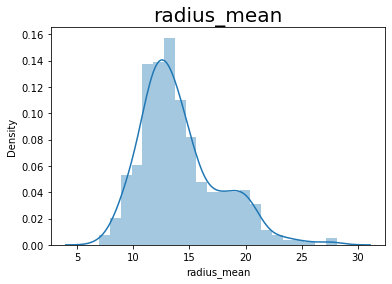

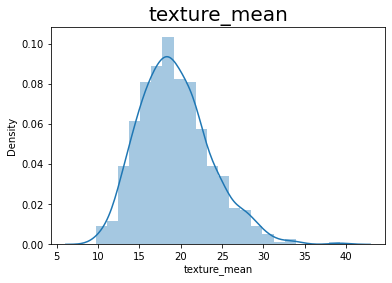

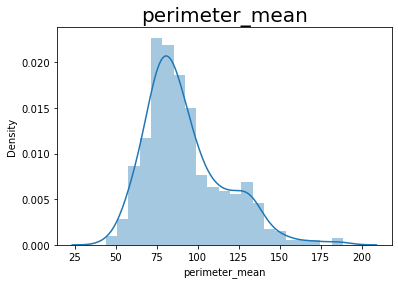

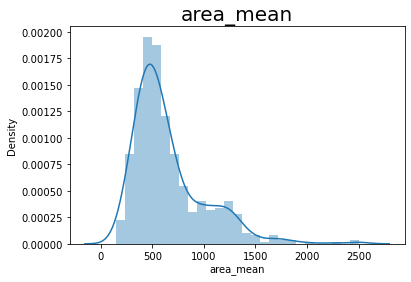

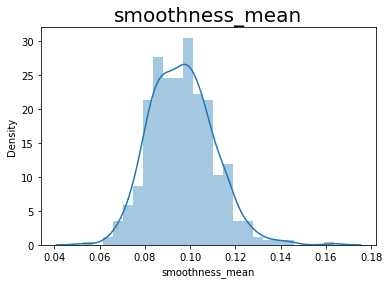

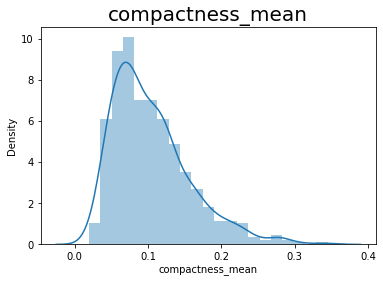

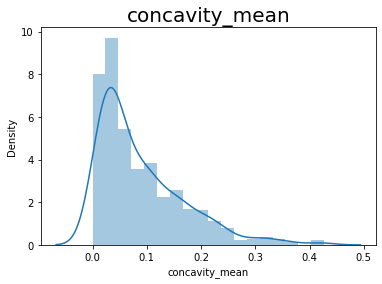

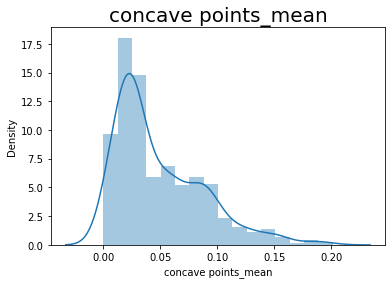

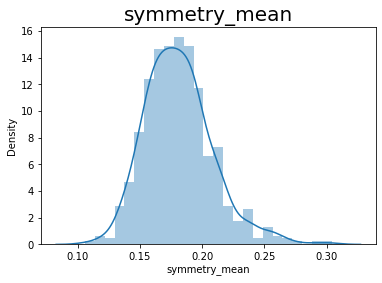

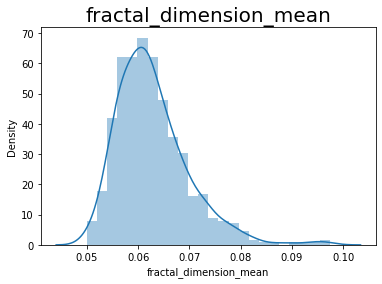

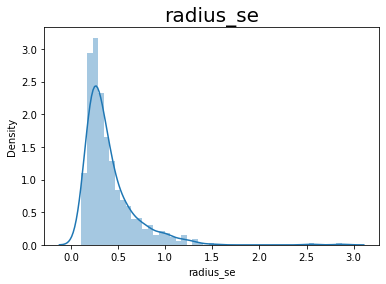

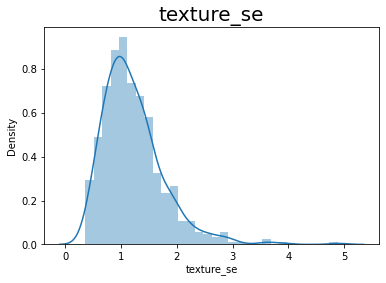

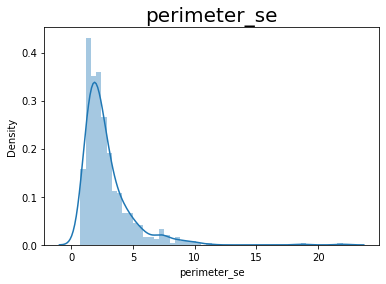

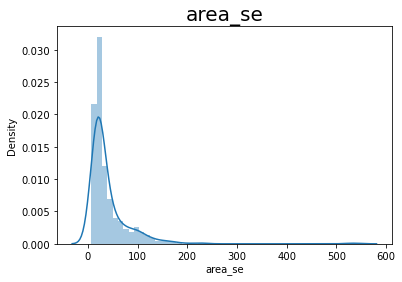

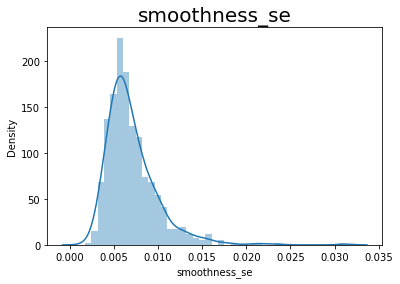

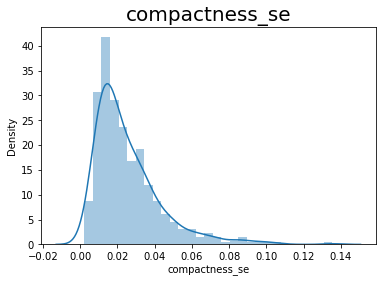

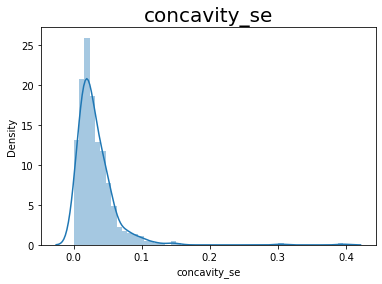

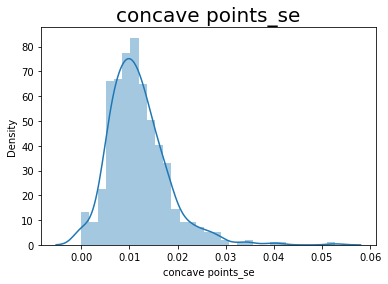

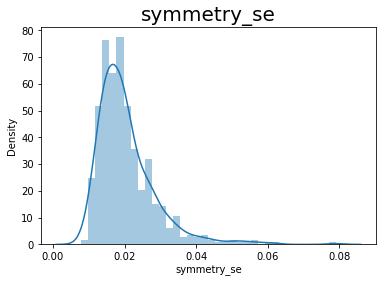

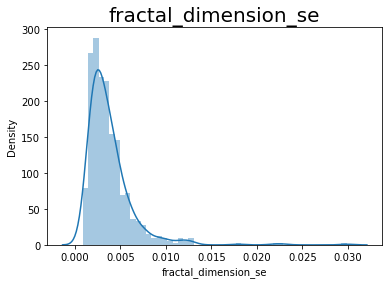

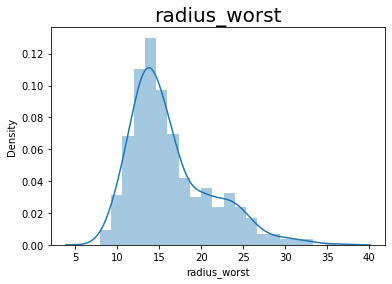

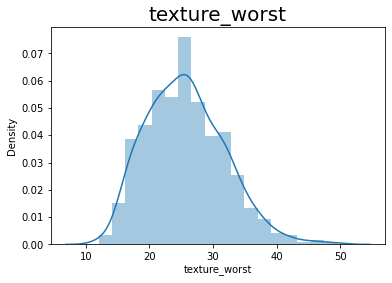

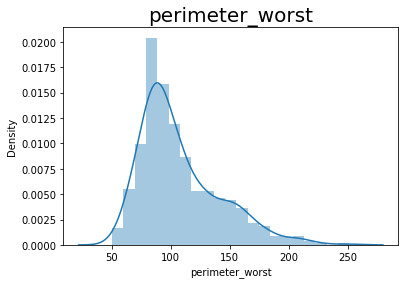

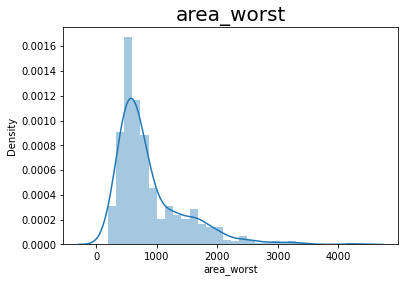

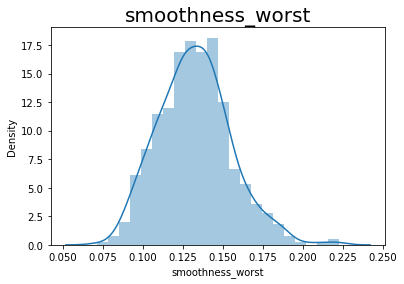

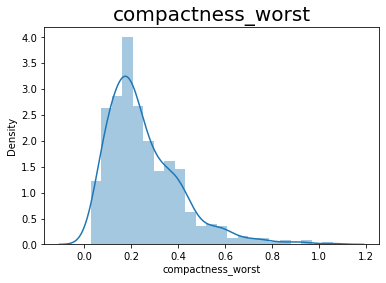

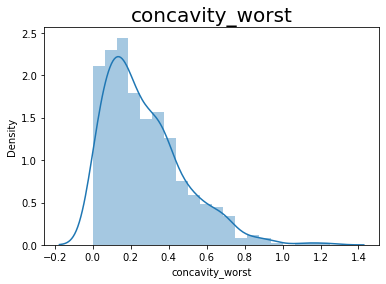

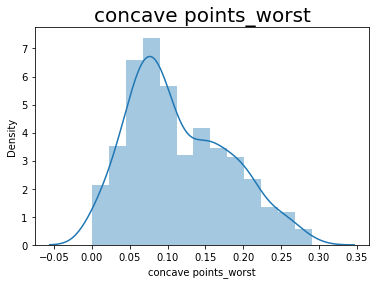

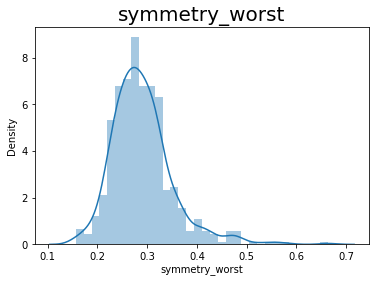

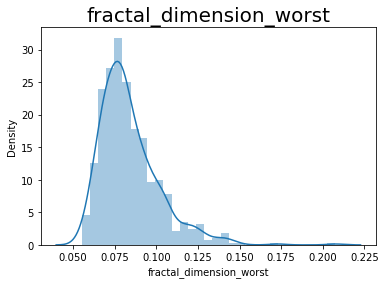

In [10]:
for i in cont_columns:
    sns.distplot(data[i])
    plt.title(i,fontsize=20)
    plt.show()

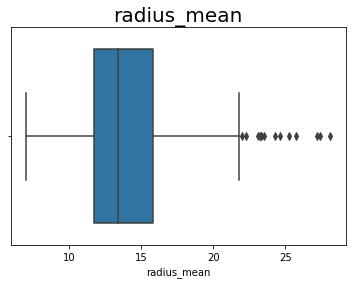

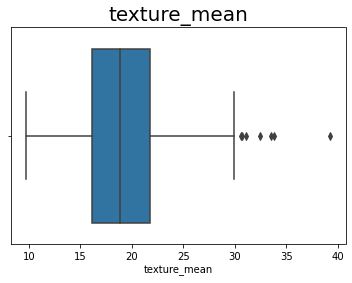

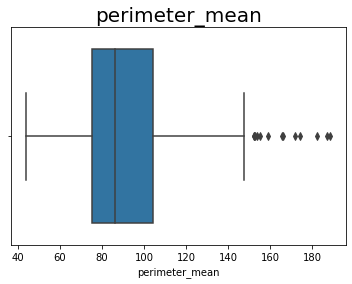

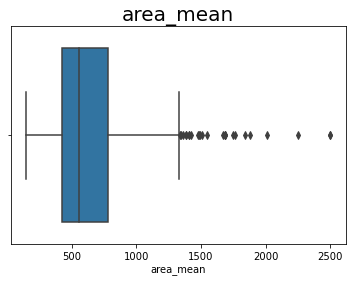

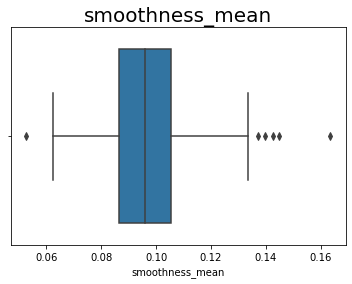

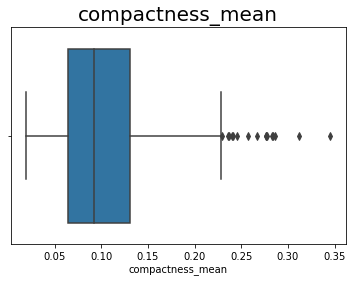

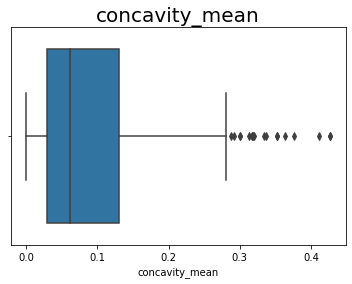

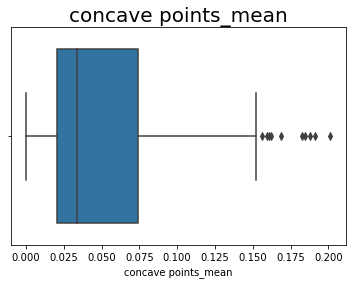

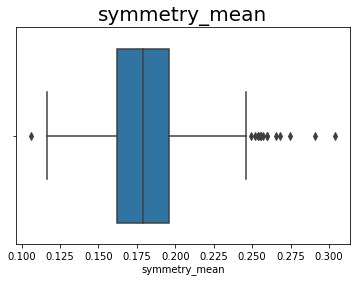

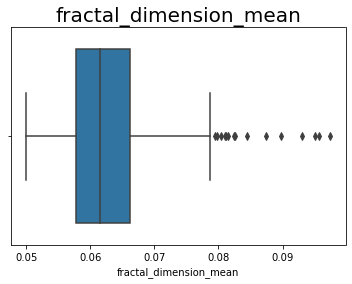

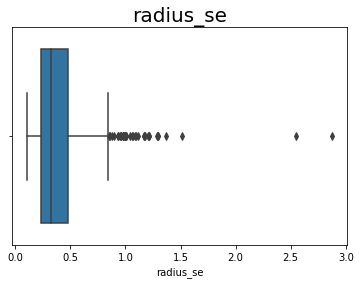

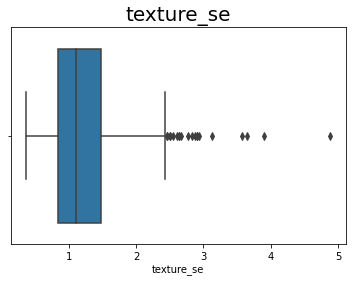

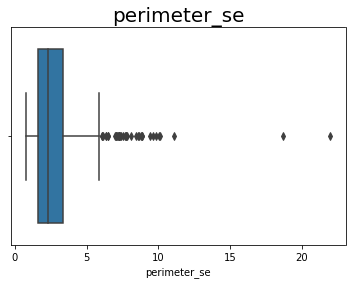

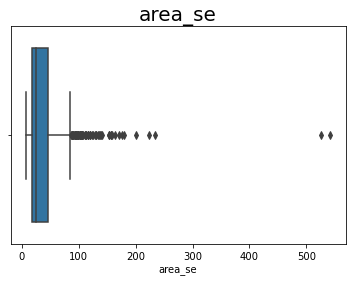

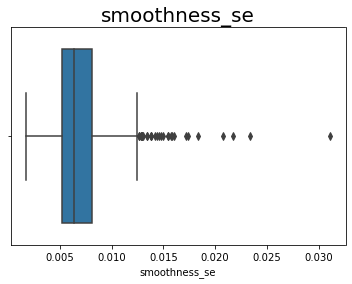

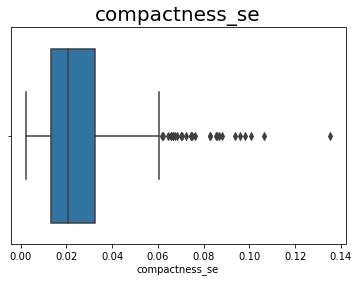

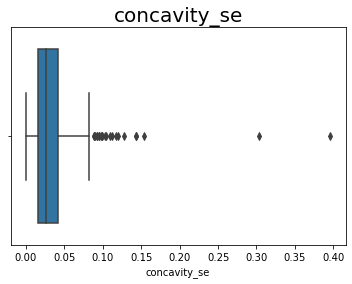

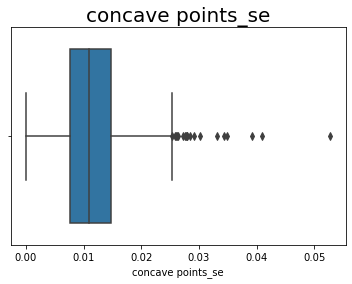

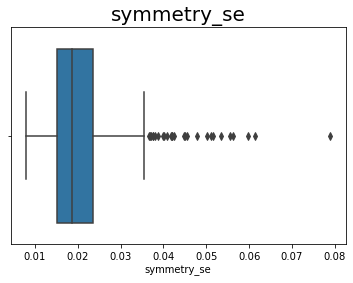

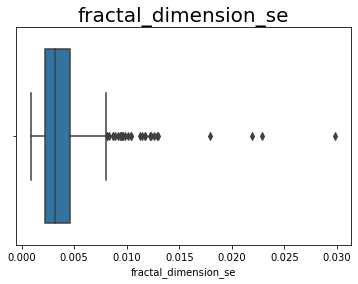

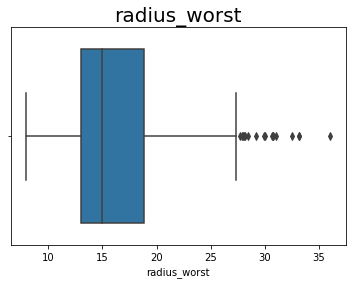

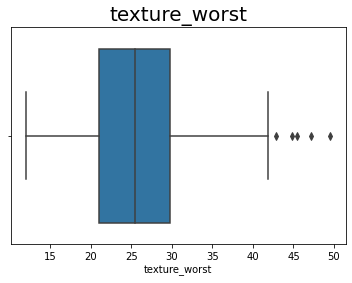

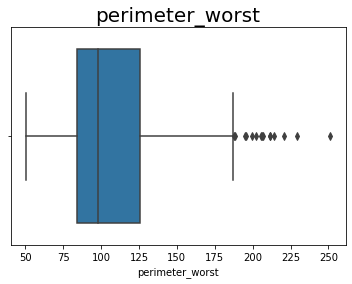

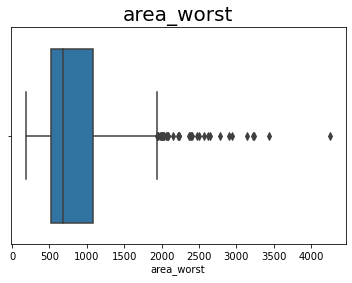

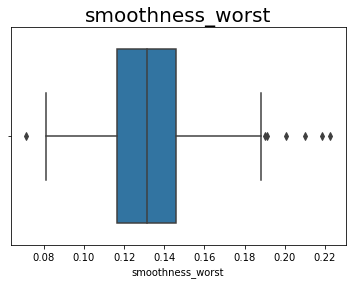

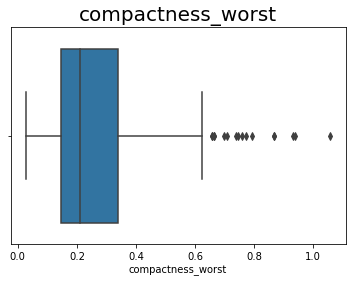

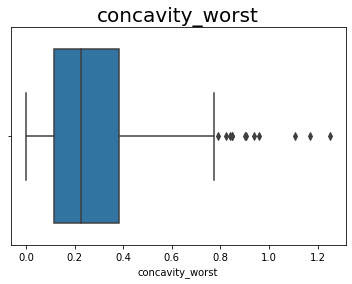

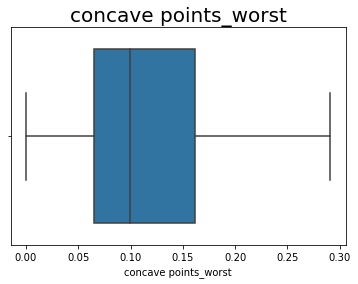

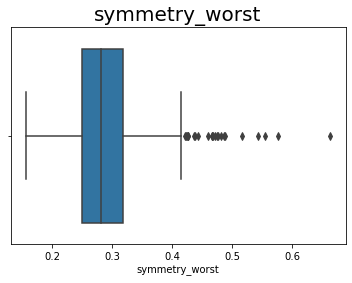

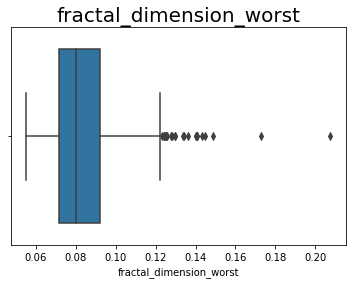

In [11]:
for i in cont_columns:
    sns.boxplot(data[i])
    plt.title(i,fontsize=20)
    plt.show()

## `Multivariate Analysis` 
### 1. `T-Test` Cont vs Target

In [12]:
from scipy.stats import ttest_ind

def t_test(col,grp1,grp2):
    plt.figure(figsize=(24,8))
    sns.distplot(grp1)
    sns.distplot(grp2)
    t_test_results = ttest_ind(grp1,grp2)
    print(f'{col} ==> t_test result ==> {t_test_results}')

radius_mean ==> t_test result ==> Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)
texture_mean ==> t_test result ==> Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)
perimeter_mean ==> t_test result ==> Ttest_indResult(statistic=26.405212979192665, pvalue=8.43625103617473e-101)
area_mean ==> t_test result ==> Ttest_indResult(statistic=23.938687235690992, pvalue=4.734564310307344e-88)
smoothness_mean ==> t_test result ==> Ttest_indResult(statistic=9.146098808149038, pvalue=1.0518503592032013e-18)
compactness_mean ==> t_test result ==> Ttest_indResult(statistic=17.69839197688993, pvalue=3.9382631058873895e-56)
concavity_mean ==> t_test result ==> Ttest_indResult(statistic=23.103963430622642, pvalue=9.966555755072963e-84)
concave points_mean ==> t_test result ==> Ttest_indResult(statistic=29.354318592113618, pvalue=7.101150161057422e-116)
symmetry_mean ==> t_test result ==> Ttest_indResult(statistic=8.338311789592808, pvalue=5.7333840

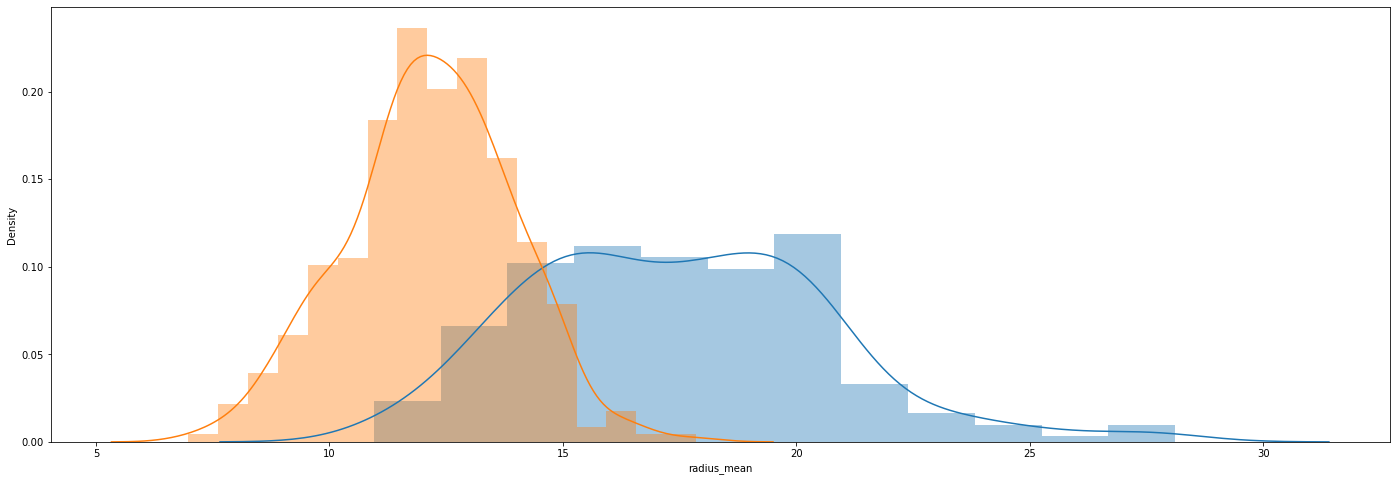

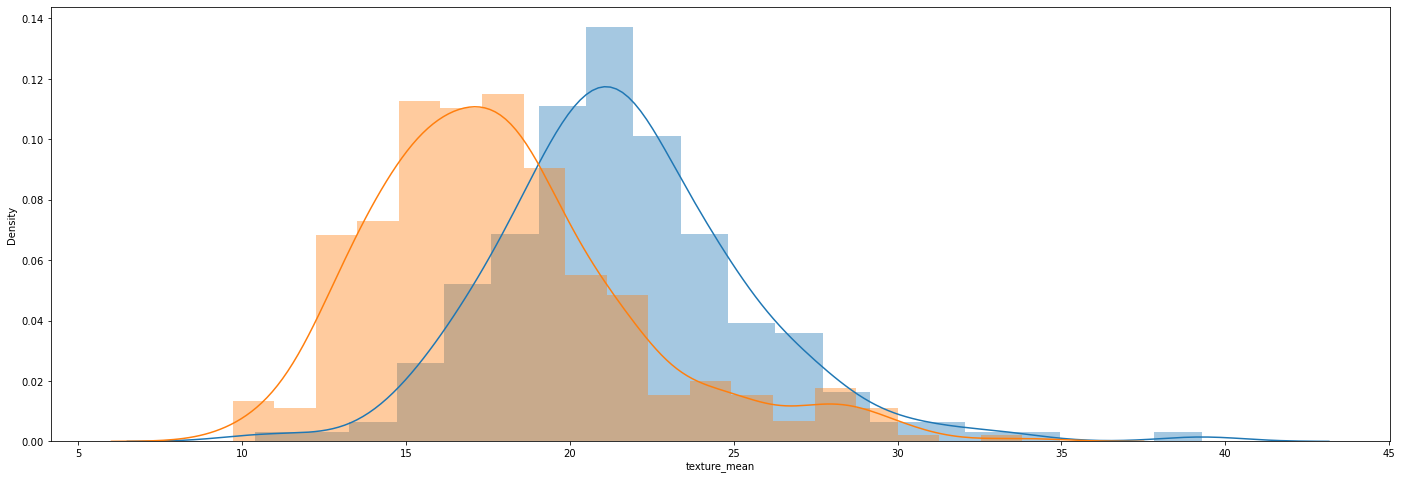

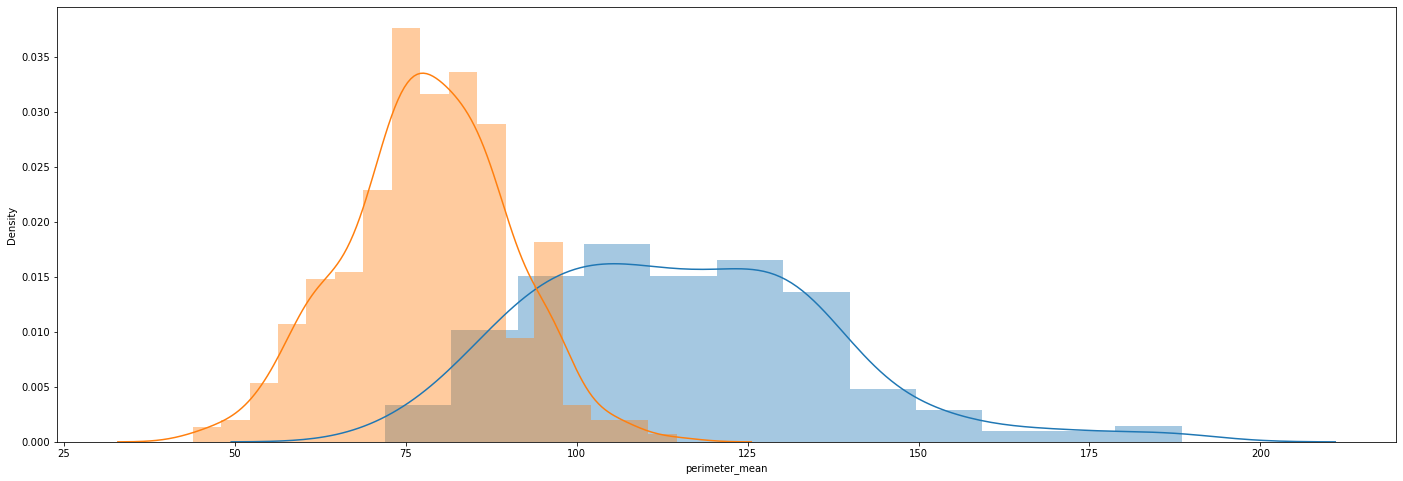

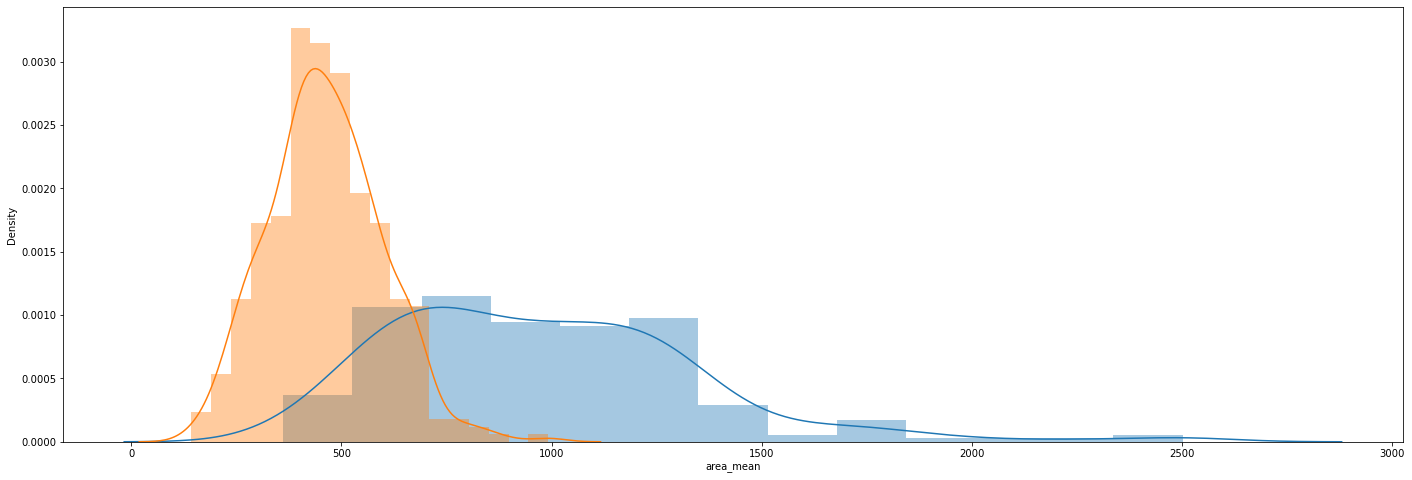

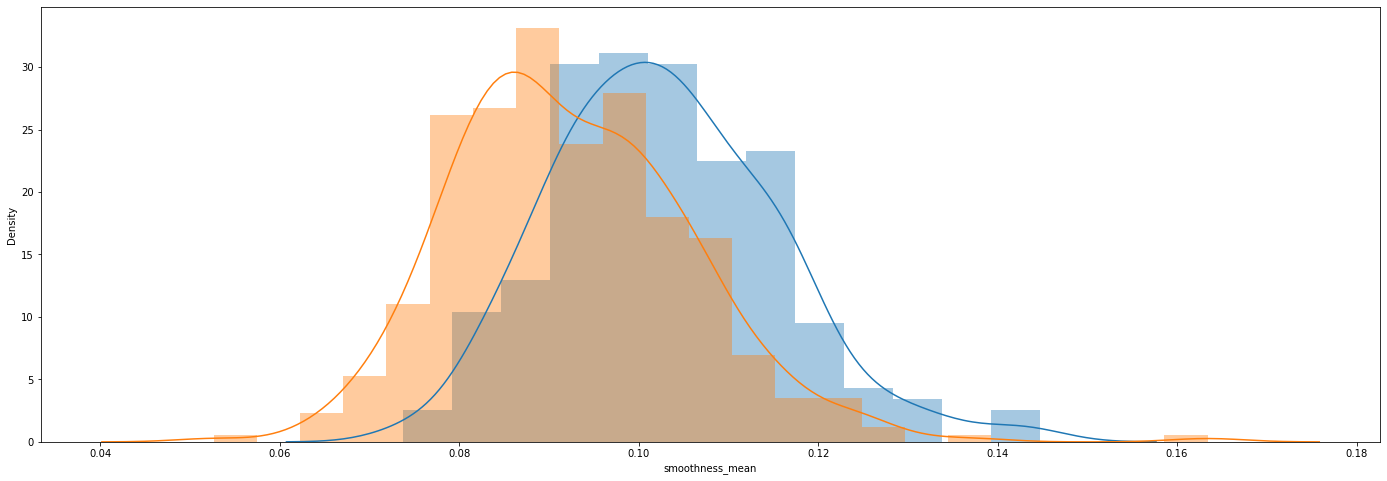

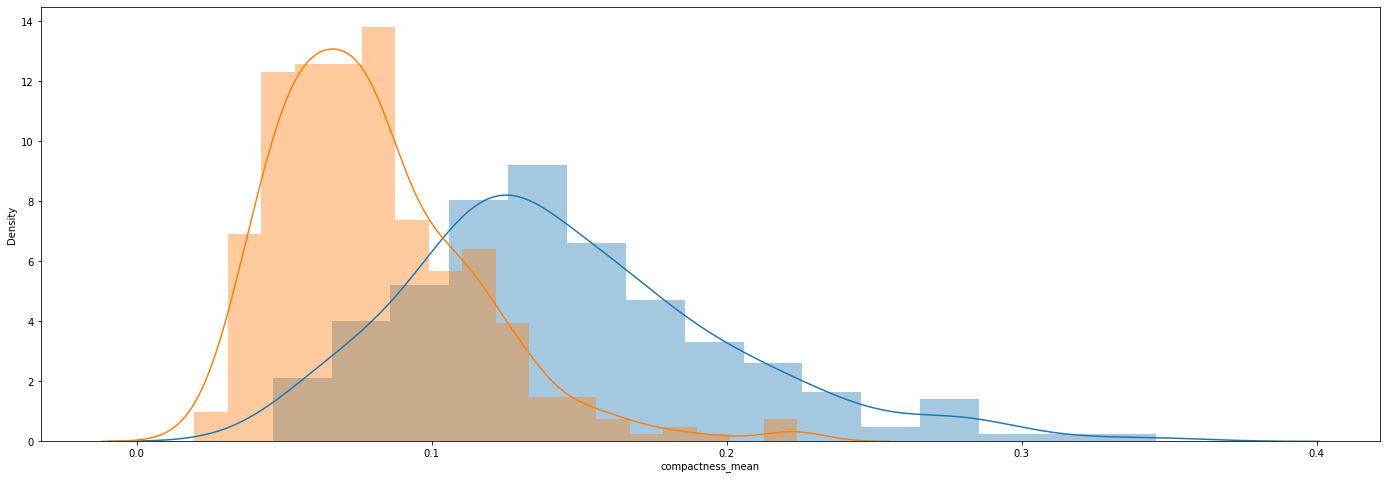

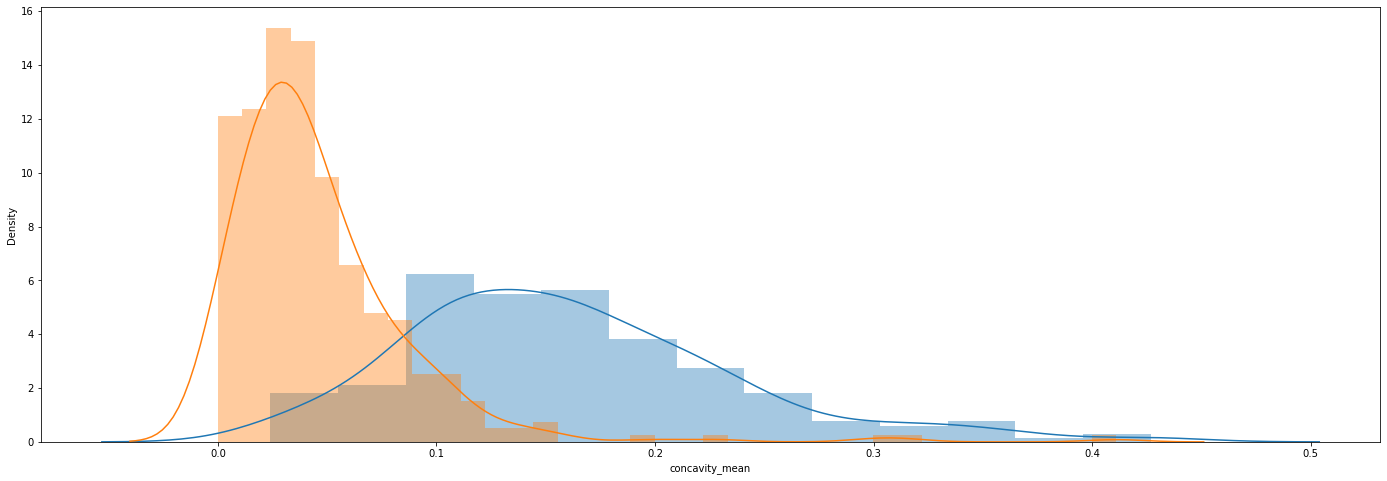

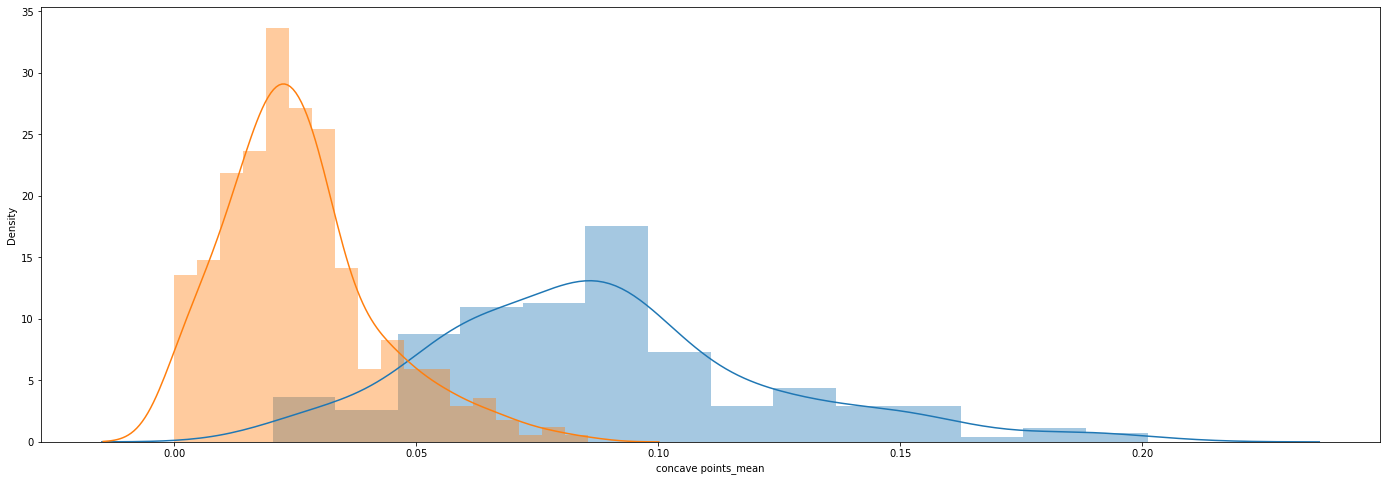

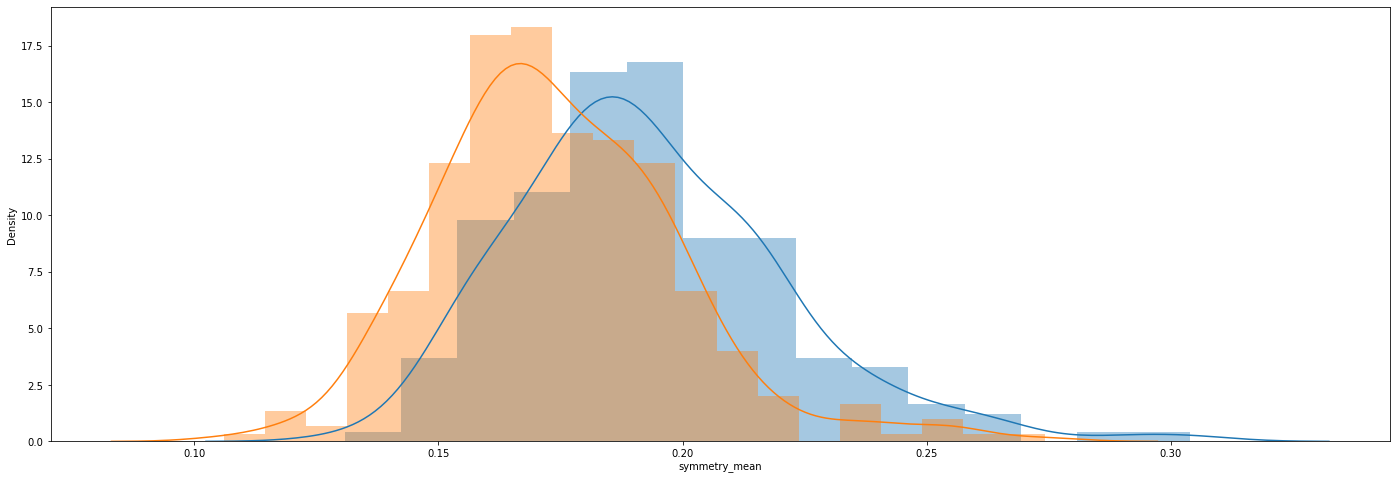

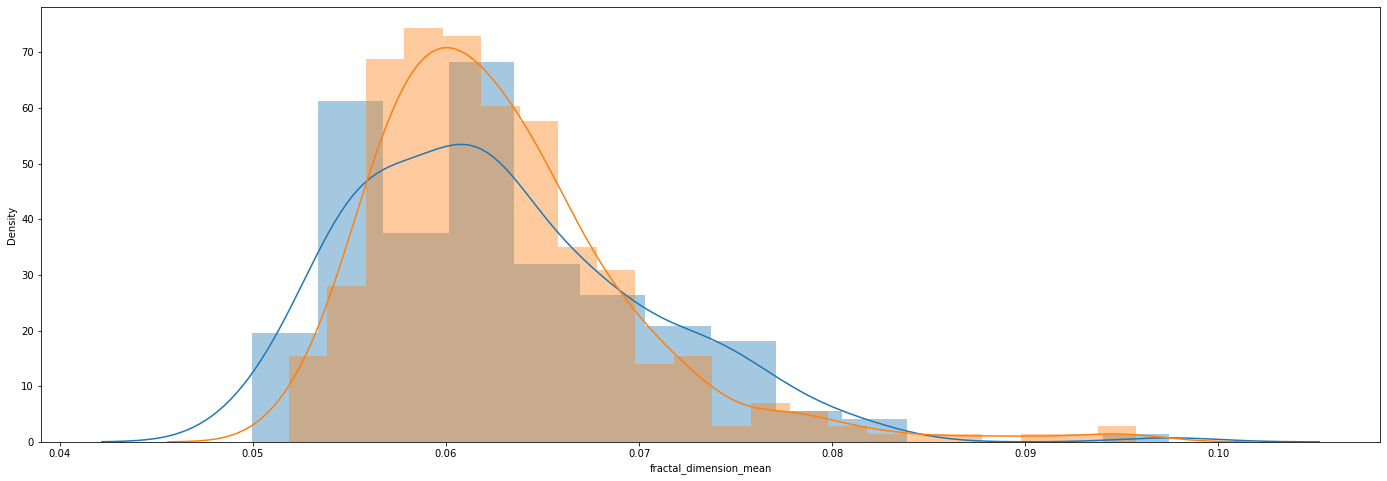

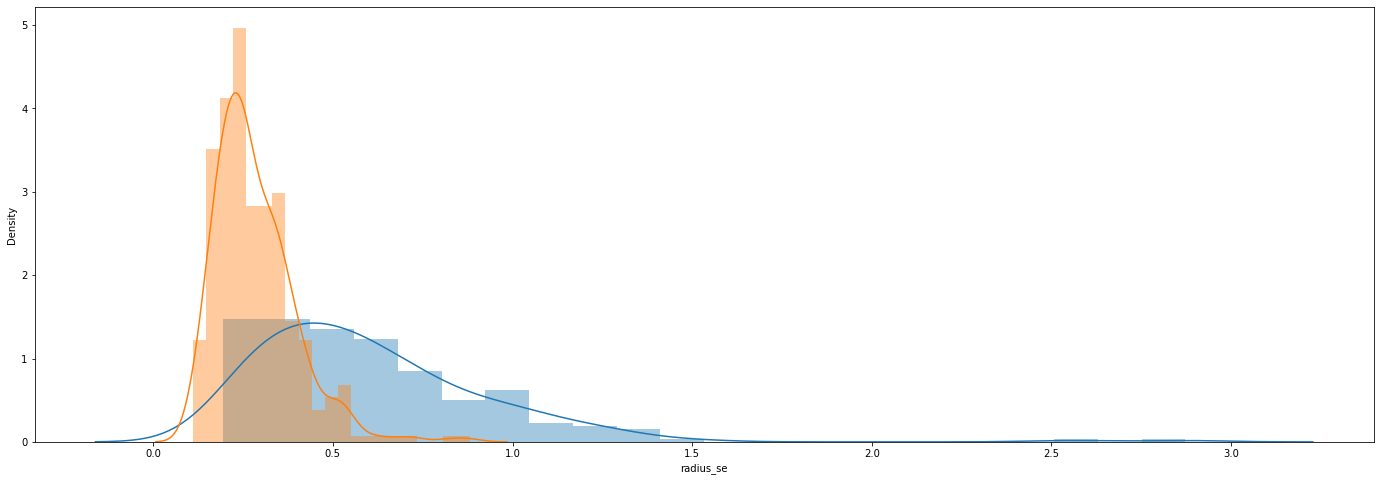

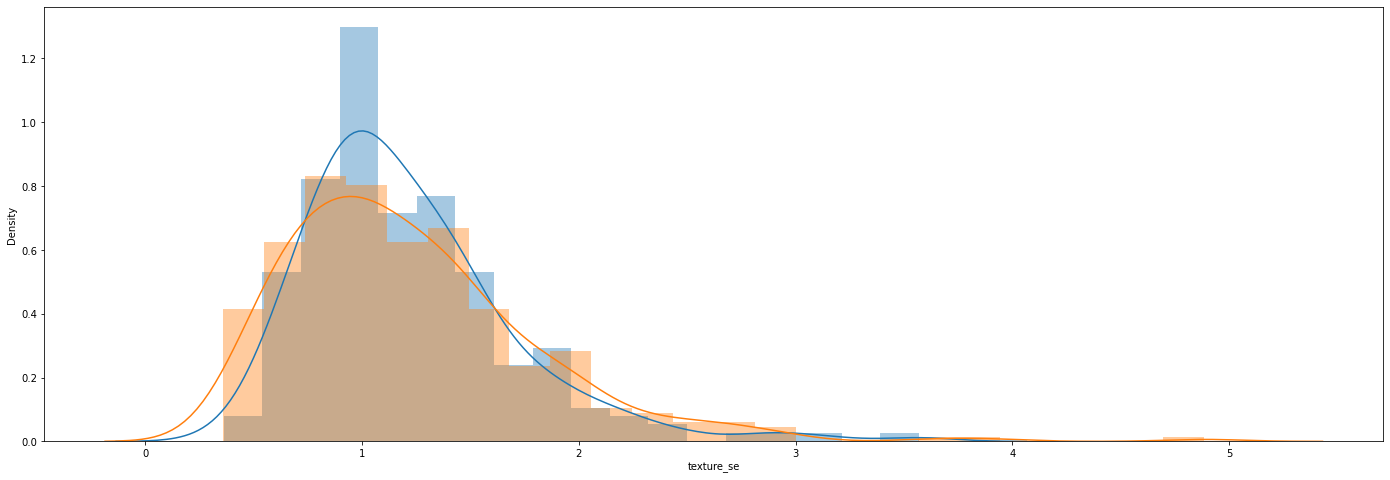

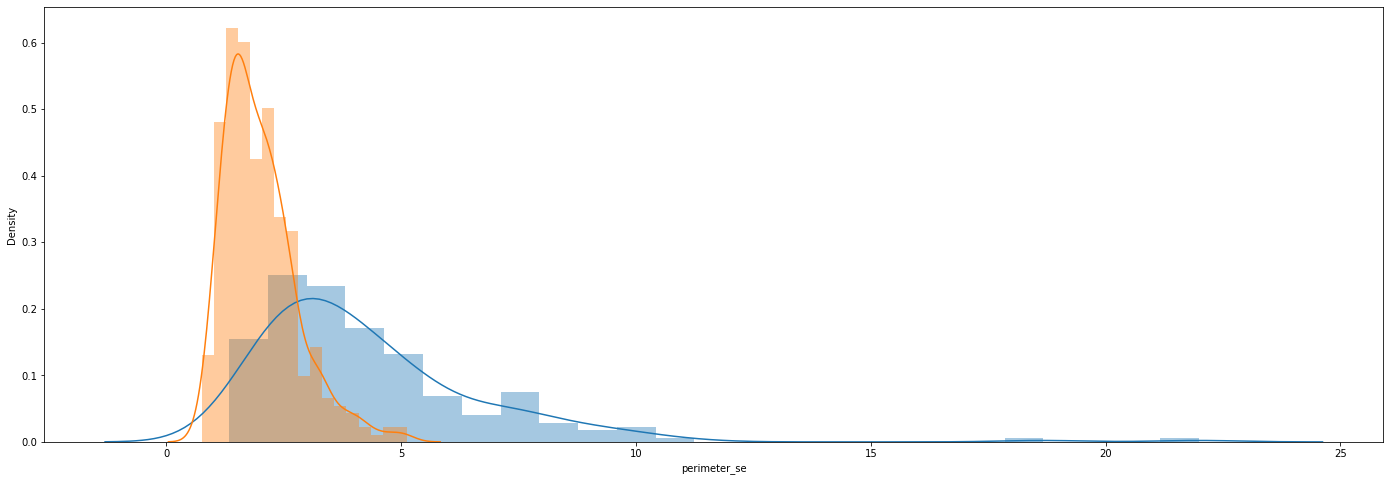

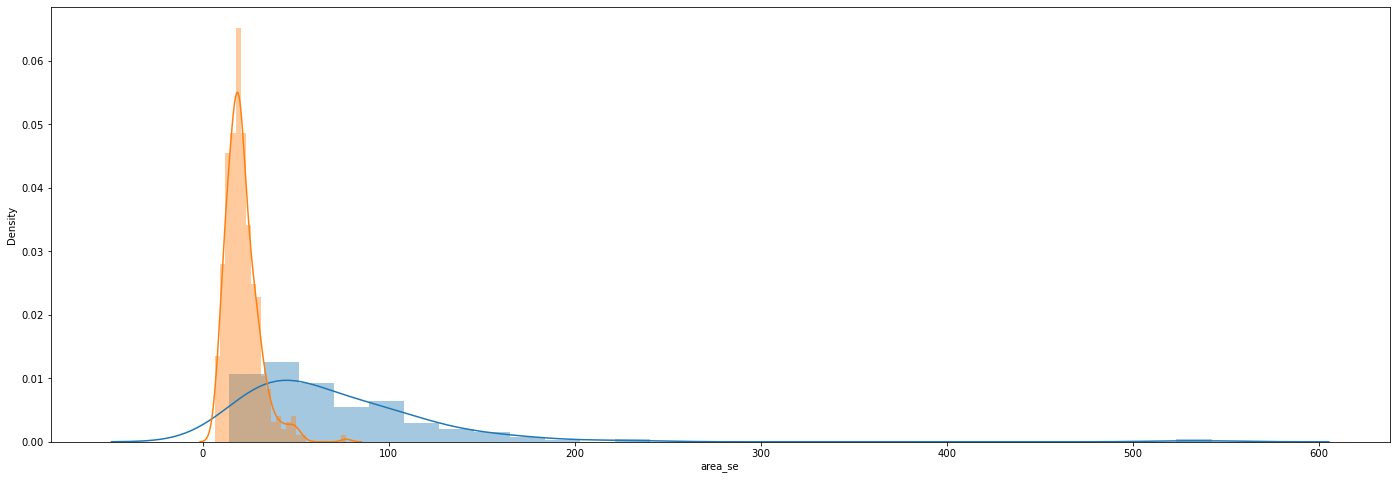

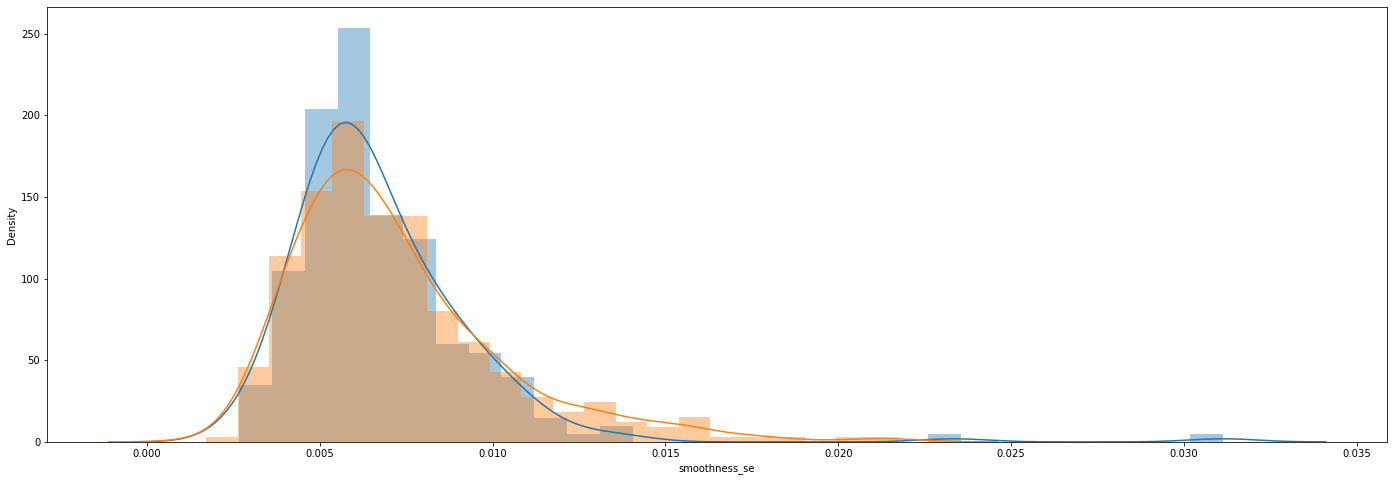

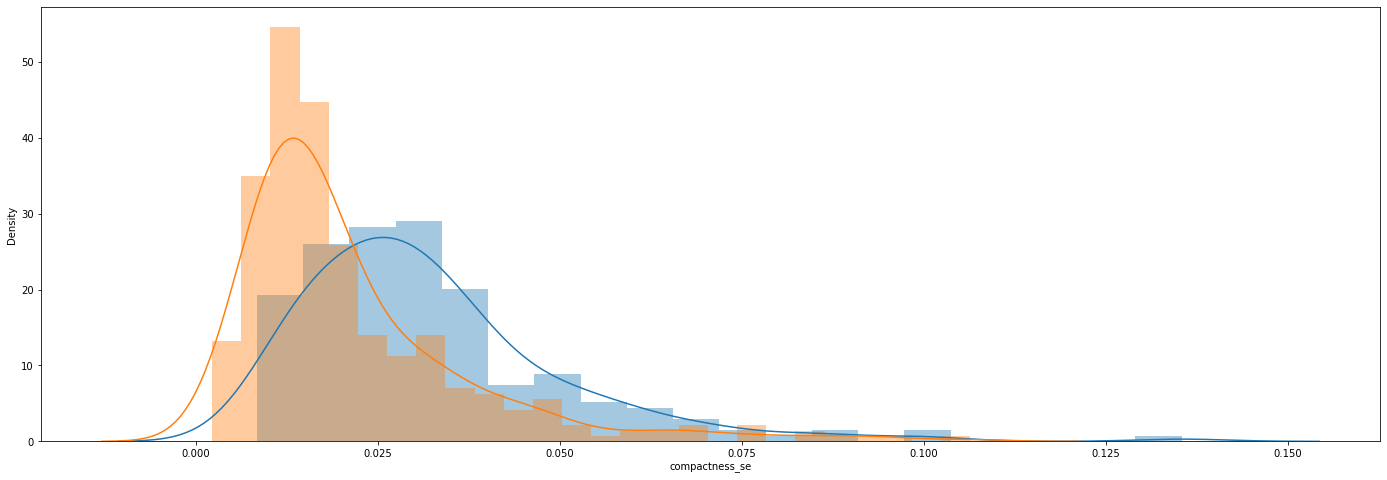

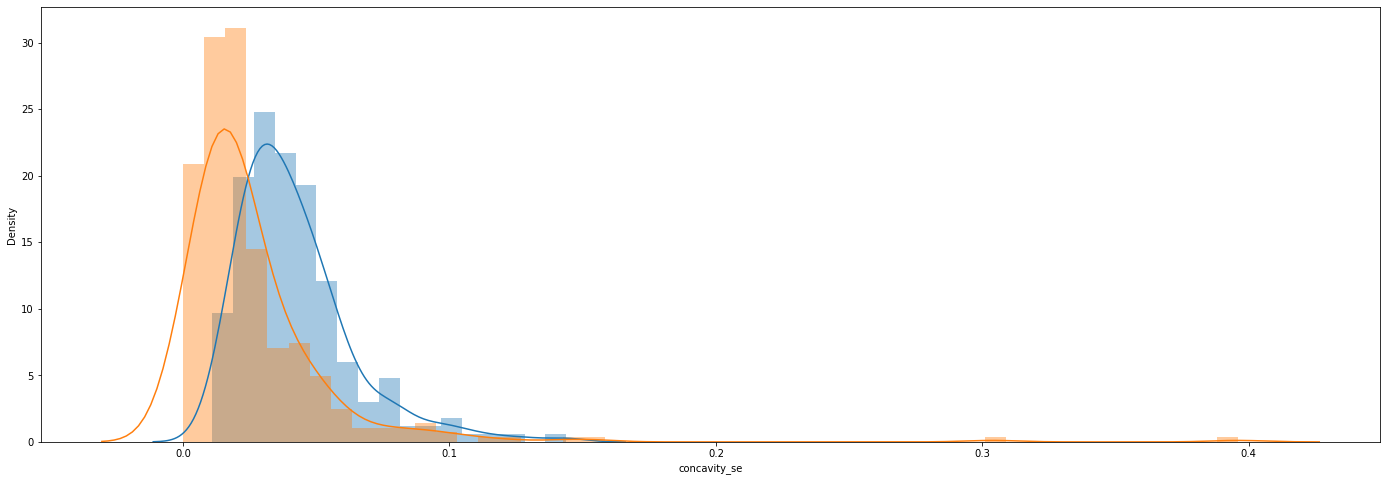

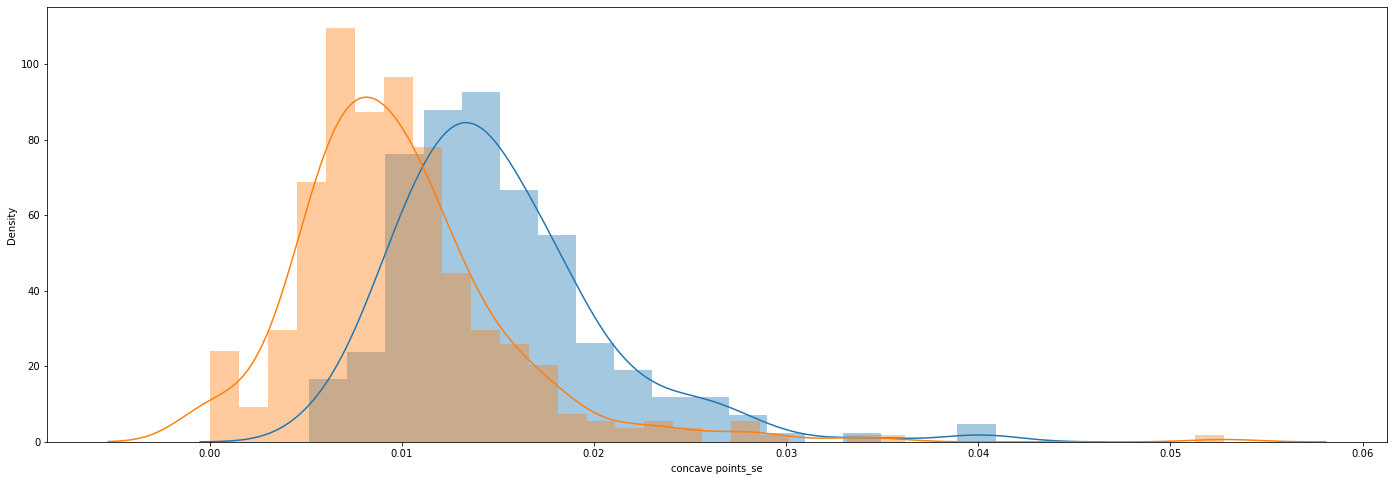

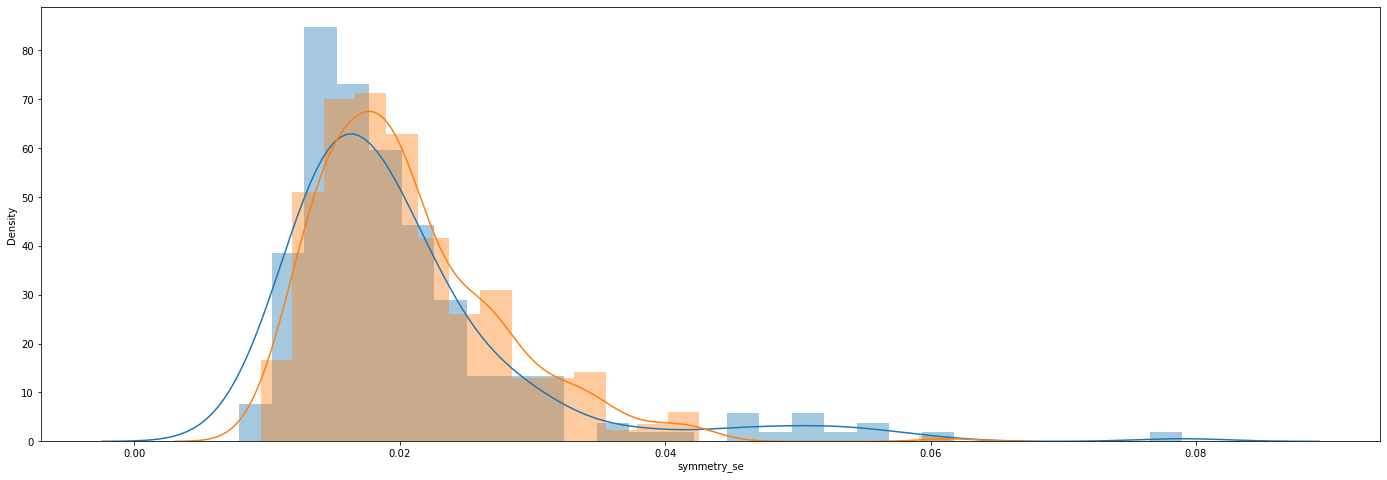

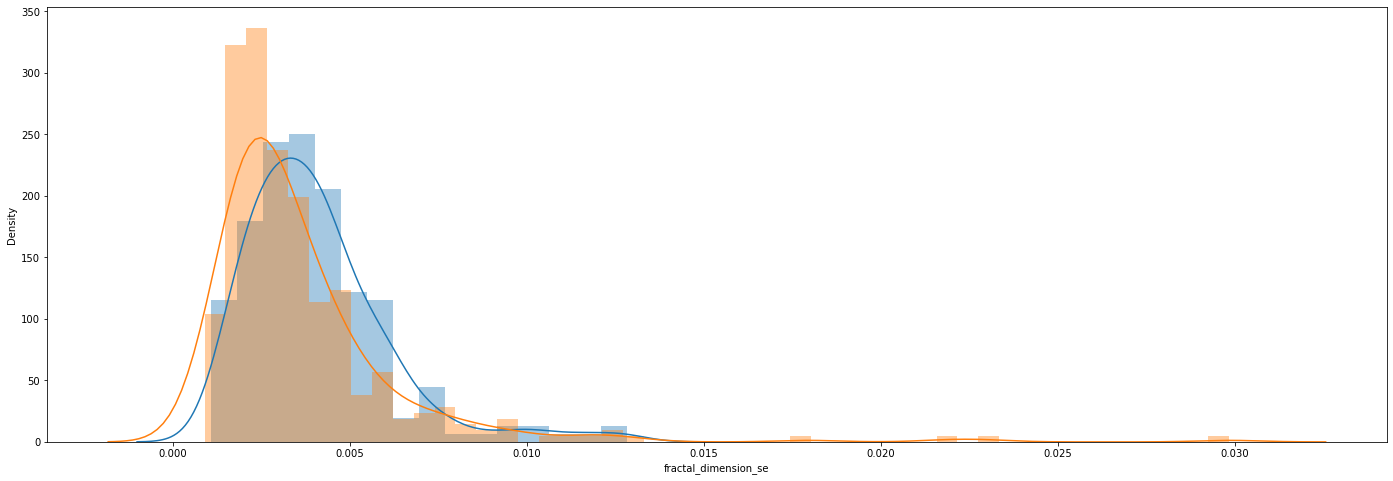

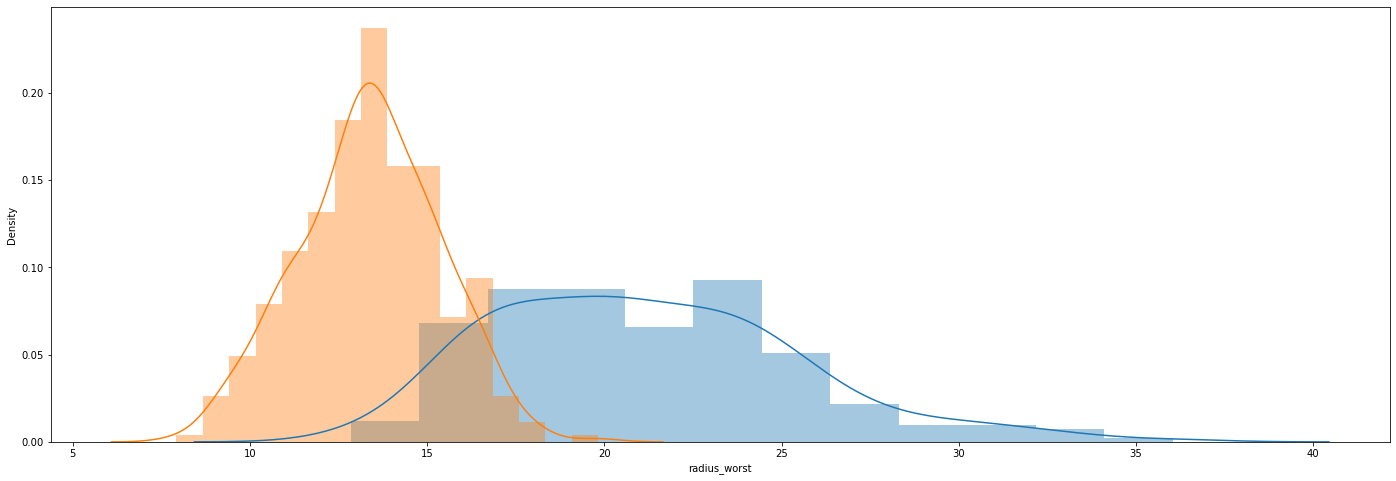

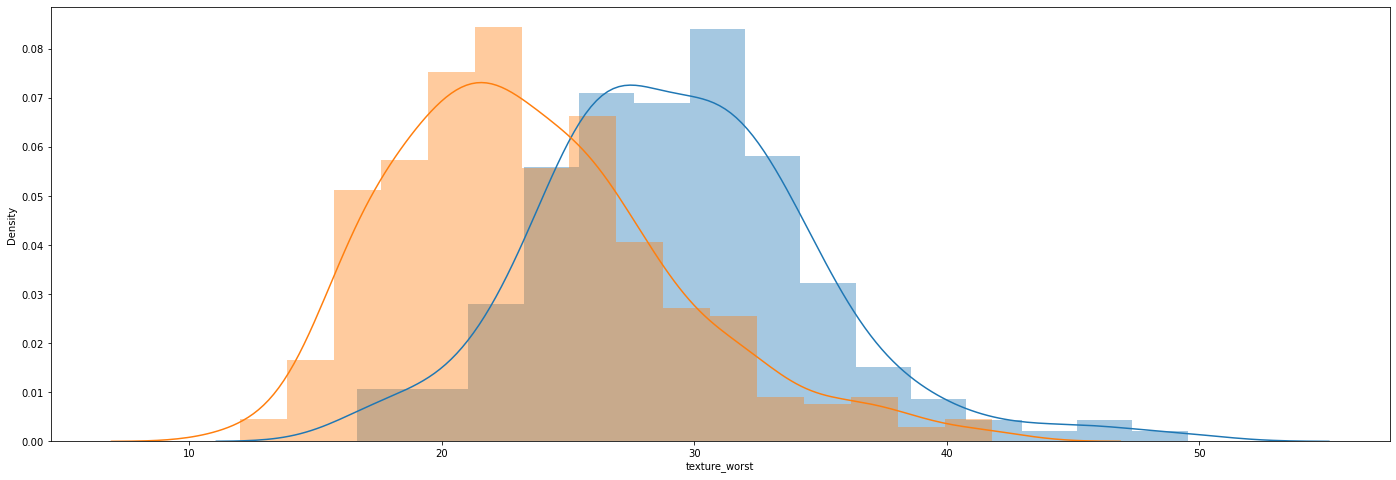

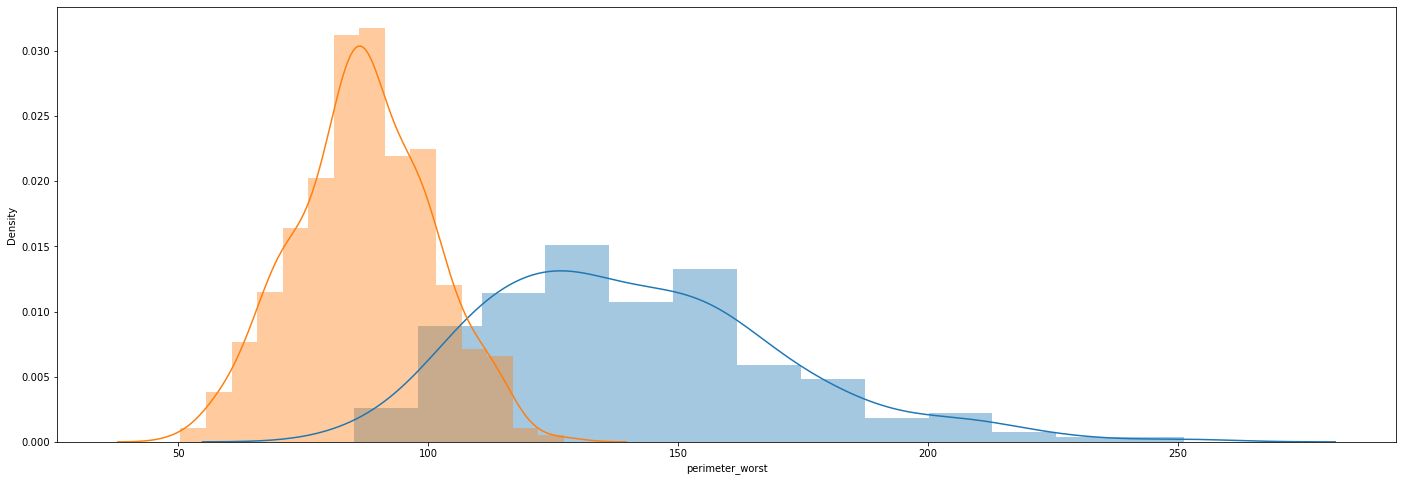

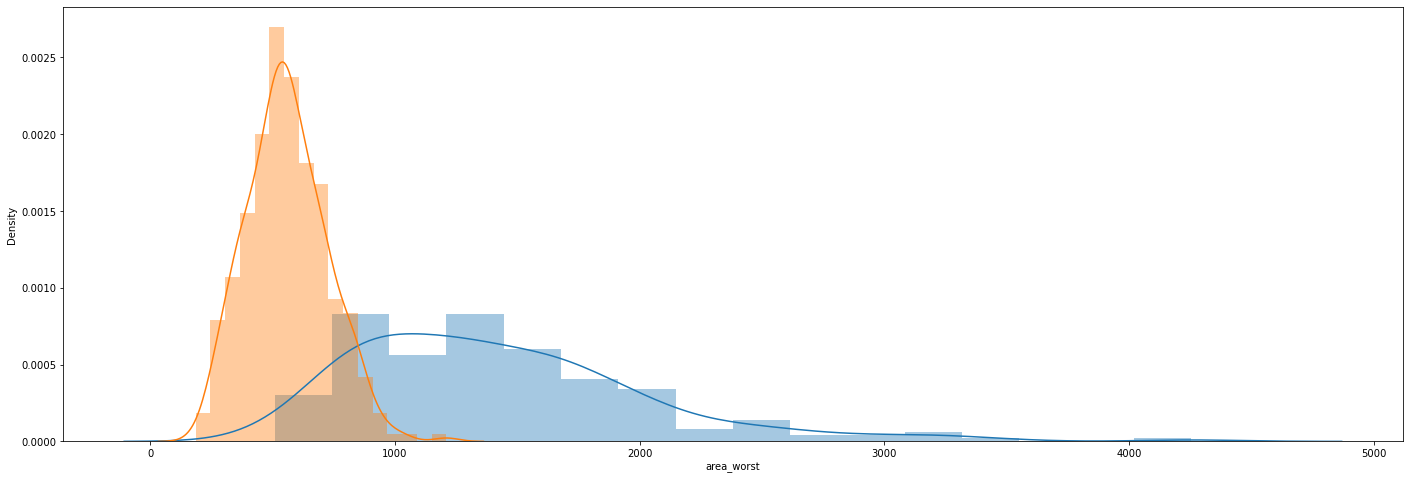

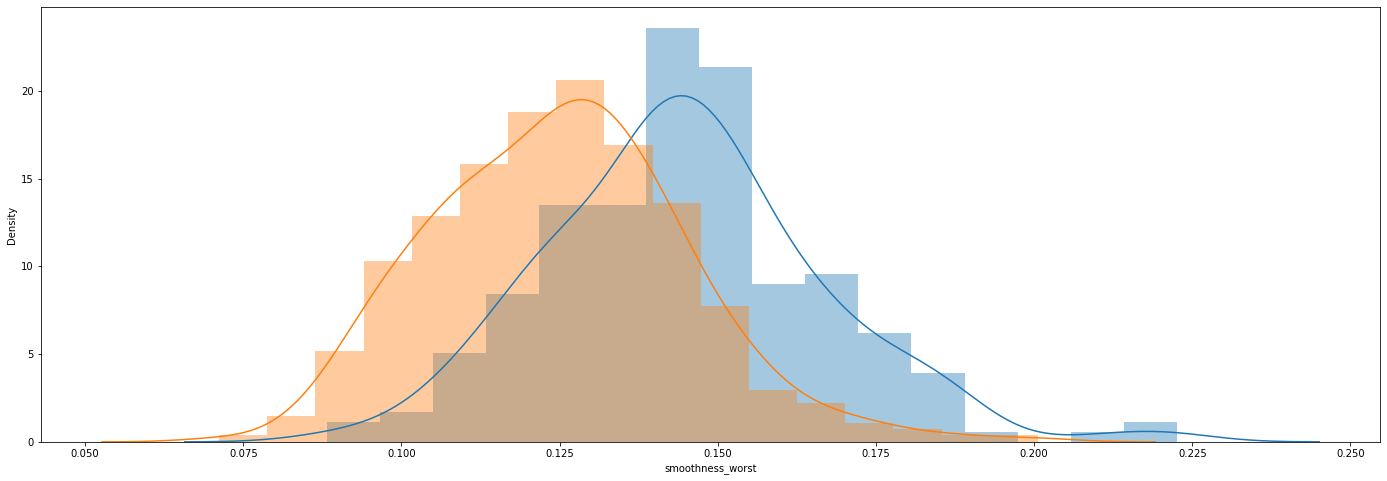

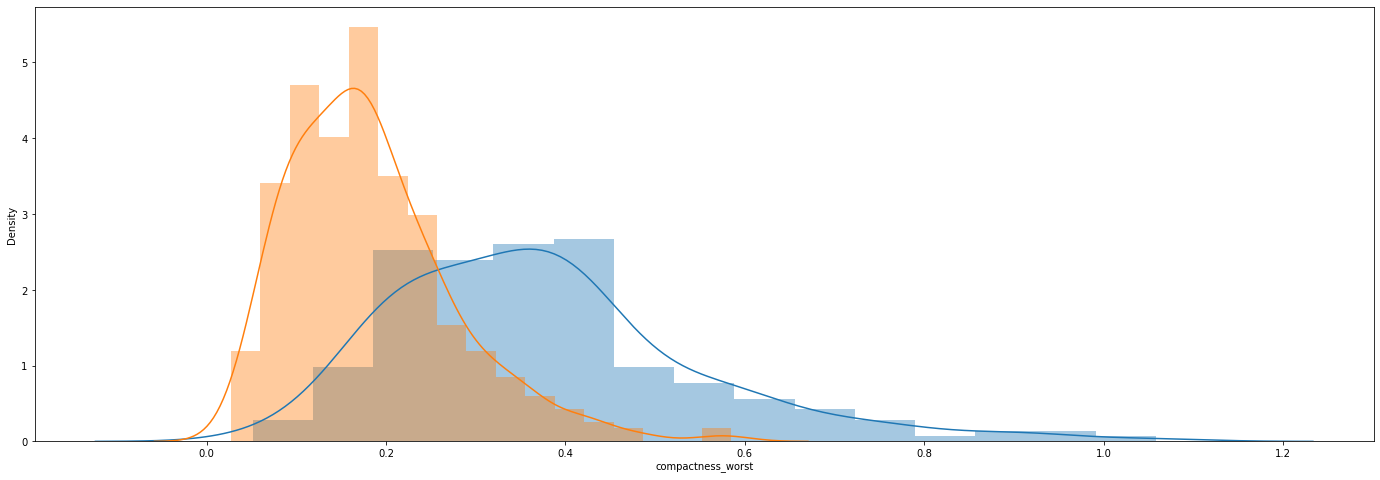

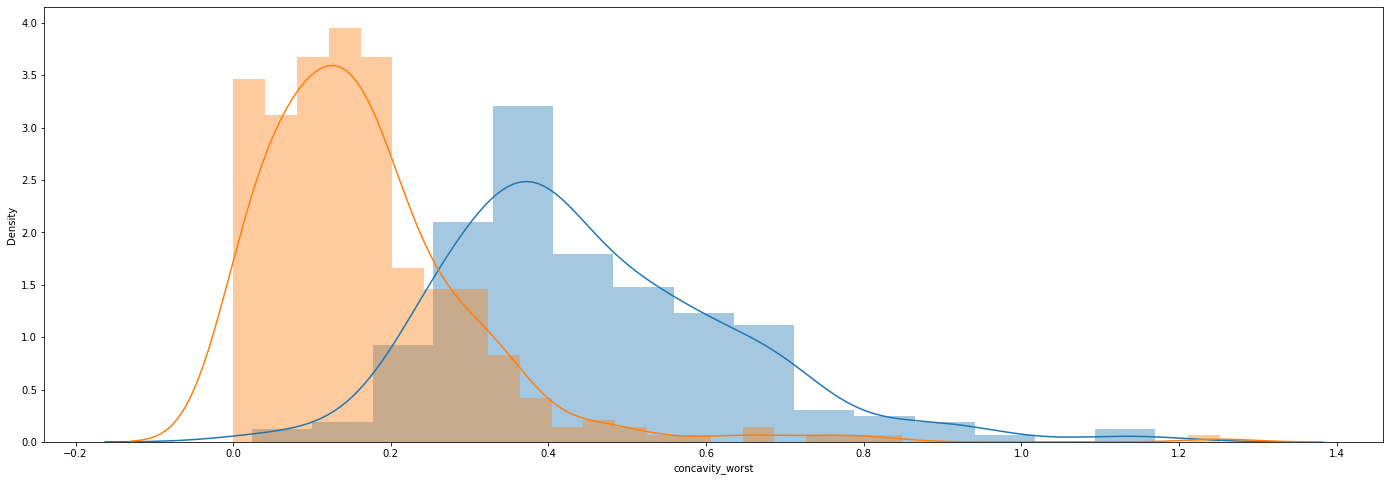

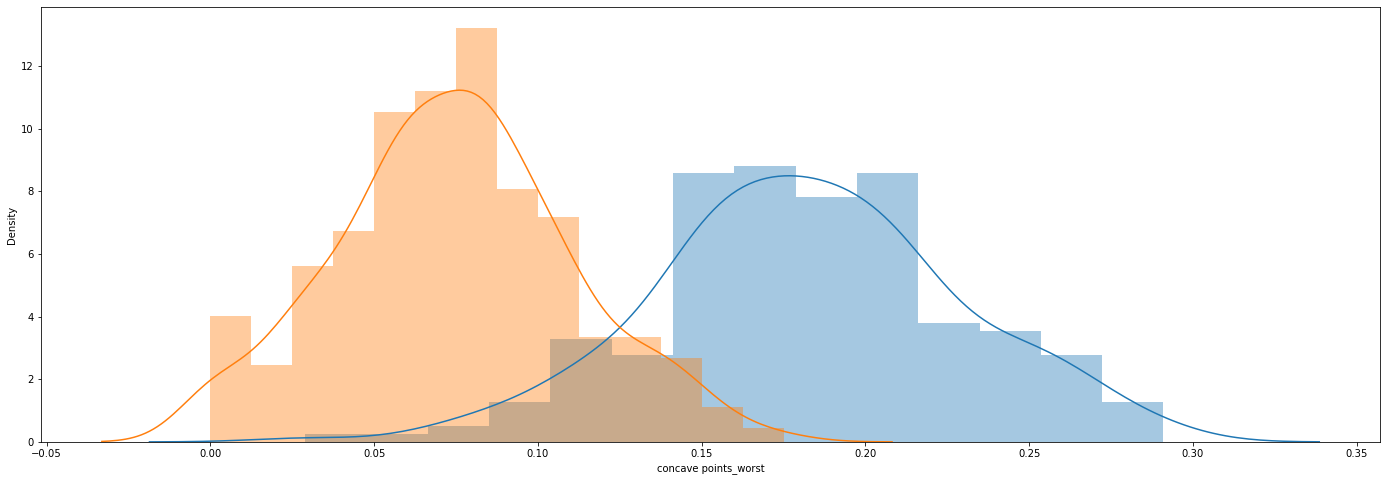

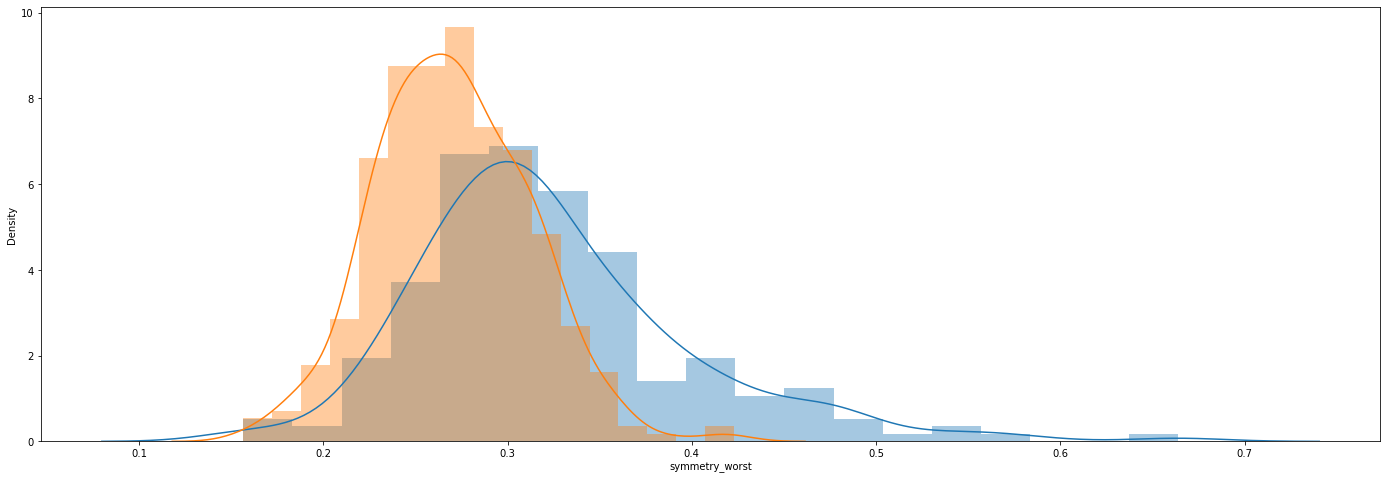

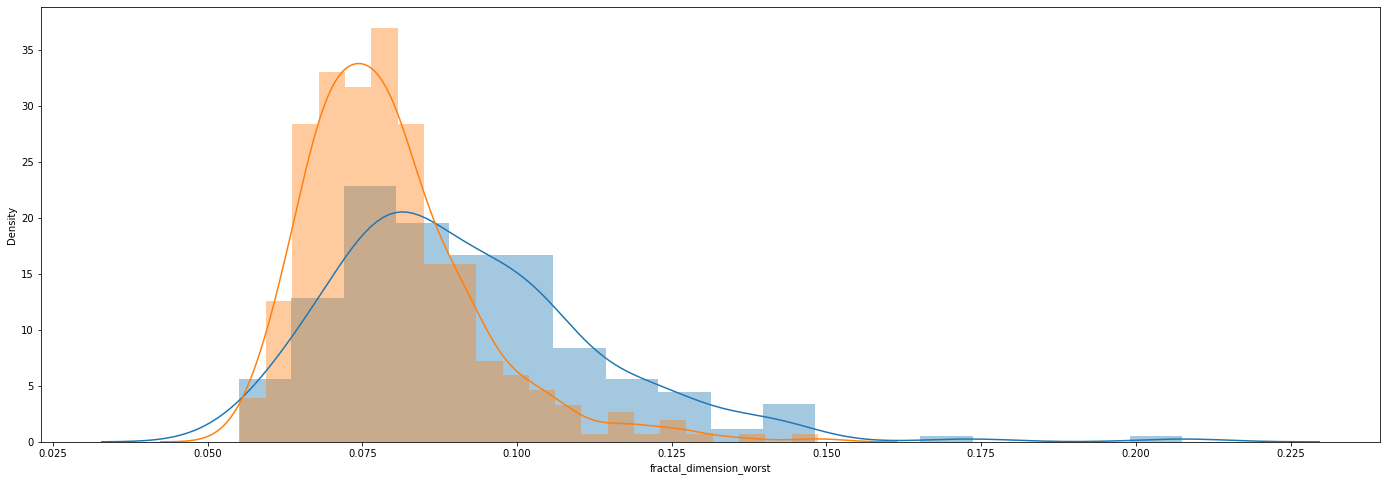

In [13]:
for col in cont_columns:
    grp1 = data.loc[target=='M',col]
    grp2 = data.loc[target=='B',col]
    t_test(col,grp1,grp2)

### `p-value > 0.05, ignore that variable`
## `Correlation Chart`

<AxesSubplot:>

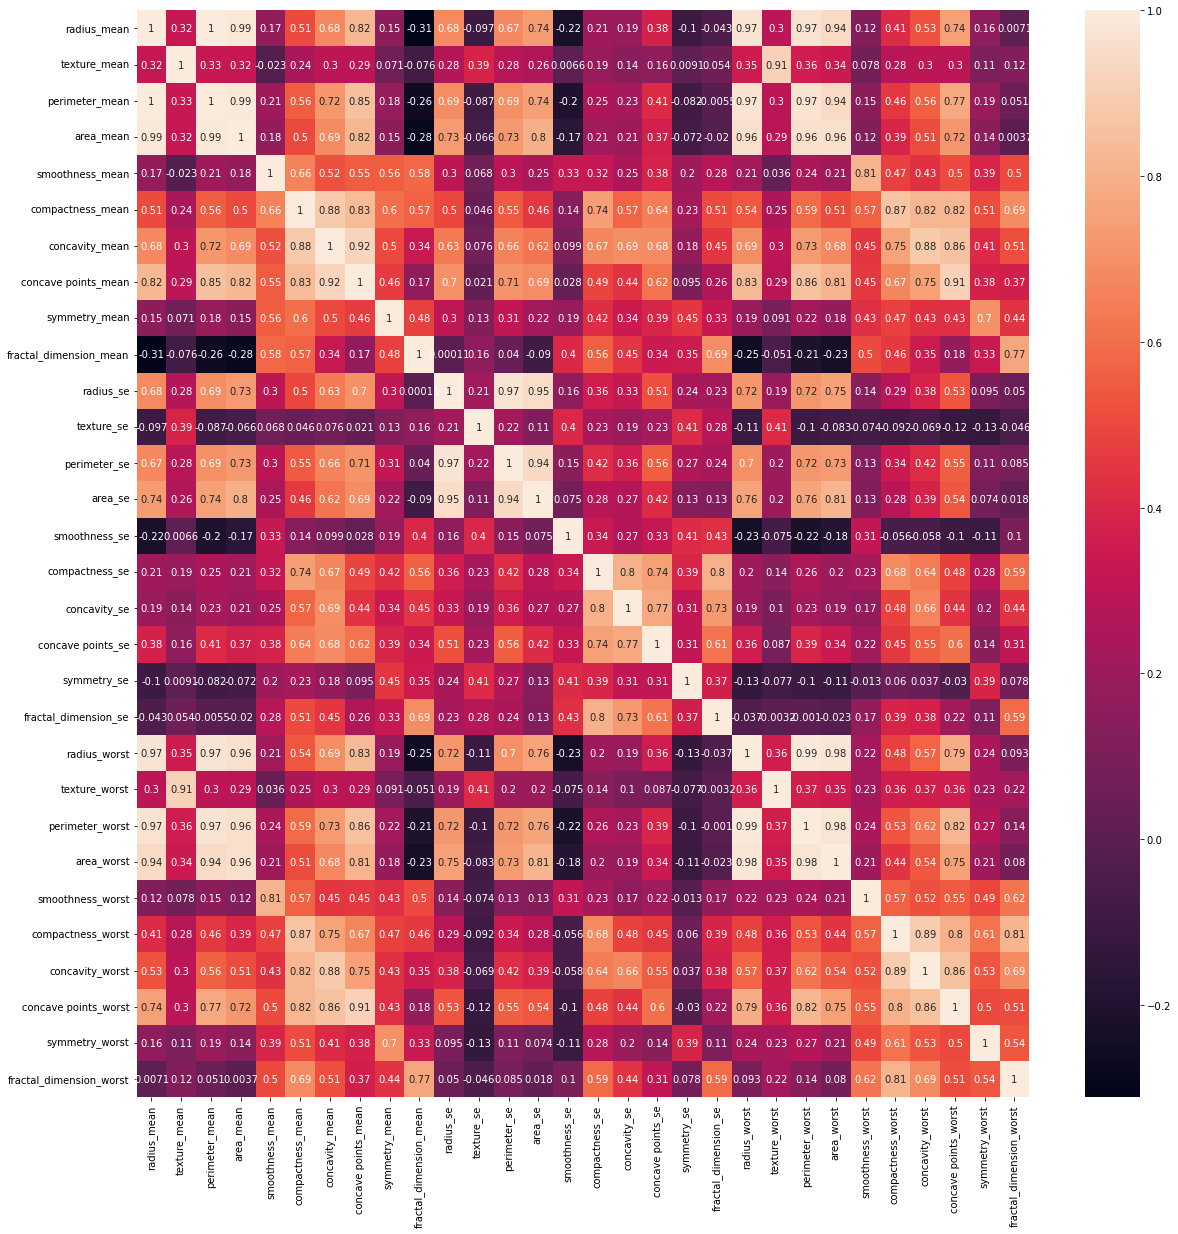

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

### `Logistic Regressionn can be implemented by`:
1. MLE
2. Gradient Descent
3. SGD
4. BFGS...etc multiple methods

### `How do you convert line to a S-shaped curved(Important Interview Question)`

### `Odd's ratio`:
- probability of success/probability of failure = p/(1-p)
- winning ratio / odd's ratio

### `log transformation of odd's ratio graph gives us the s-shaped curve`

### `We use MLE, GD or SGD are used to find the coefficient of Logistic Regression`

## `Gradient Descent Logistic Regression`